In [1]:
import pandas as pd

mmp_data = pd.read_excel('MMP_transactionDatewise.xlsx')
mmp_data = mmp_data[:-19] # This step is done to remove the discrepancy in the data.
mmp_data.head()

,STDDate,Project Name,State,Standard Service,TotalCount,Transaction(in Lakhs)
0,2013-01-01,Agriculture,Maharashtra,Agriculture & Allied,1599,0.01599
1,2013-01-01,Agriculture,Odisha,Licenses and Permits,1,0.00001
2,2013-01-01,Agriculture,Uttar Pradesh,Agriculture & Allied,98,0.00098
3,2013-01-01,Agriculture,West Bengal,Licenses and Permits,9,0.00009
4,2013-01-01,Commercial Taxes,Andhra Pradesh,Commercial Tax,62205,0.62205


In [2]:
education = {'Date': [], 'Count': []}
for i in range(0, len(mmp_data)):
    if (mmp_data['Project Name'][i] == 'CSC' and
       mmp_data['Standard Service'][i] == 'Education'):
        if (len(education['Date']) == 0 or
           education['Date'][-1] != mmp_data['STDDate'][i]):
            education['Date'].append(mmp_data['STDDate'][i])
            education['Count'].append(mmp_data['TotalCount'][i])
        else:
            education['Count'][-1] += mmp_data['TotalCount'][i]

In [3]:
education_data = pd.DataFrame(data=education)
education_data.head()

,Date,Count
0,2013-01-01,4
1,2013-01-03,2
2,2013-01-04,6
3,2013-01-07,1
4,2013-01-09,1


In [4]:
education_data.index = education_data.Date
education_data.drop('Date', axis=1, inplace=True)

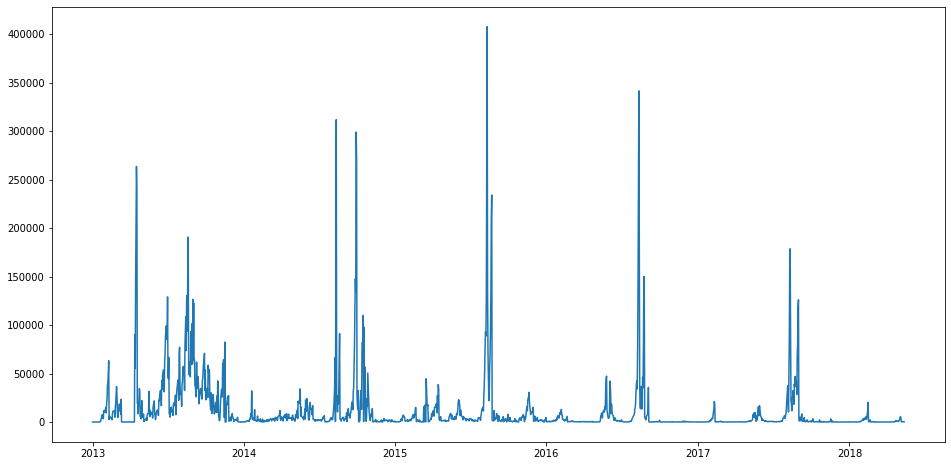

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(education_data)

## Regression

In [34]:
print(education_data.head())

            Count
Date             
2013-01-01      4
2013-01-03      2
2013-01-04      6
2013-01-07      1
2013-01-09      1


In [35]:
new_data = pd.DataFrame(index=range(0,len(education_data)),columns=['Date', 'Count'])
for i in range(0,len(education_data)):
    new_data['Date'][i] = education['Date'][i]
    new_data['Count'][i] = education['Count'][i]
new_data.head()

,Date,Count
0,2013-01-01 00:00:00,4
1,2013-01-03 00:00:00,2
2,2013-01-04 00:00:00,6
3,2013-01-07 00:00:00,1
4,2013-01-09 00:00:00,1


In [36]:
from fastai.tabular import  add_datepart

In [37]:
add_datepart(new_data, 'Date')
new_data.drop(['Elapsed', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'], axis=1, inplace=True)

In [38]:
print(new_data.head())
train_size = int(0.90 * len(new_data))
print(train_size)

  Count  Year  Month  Week  Day  Dayofweek  Dayofyear
0     4  2013      1     1    1          1          1
1     2  2013      1     1    3          3          3
2     6  2013      1     1    4          4          4
3     1  2013      1     2    7          0          7
4     1  2013      1     2    9          2          9
1742


In [39]:
train = new_data[:train_size]
test = new_data[train_size:]

x_train = train.drop('Count', axis=1)
y_train = train['Count']
x_test = test.drop('Count', axis=1)
y_test = test['Count']

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
import numpy as np
predictions = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
print(rms)

7378.876176370612


/home/pd/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


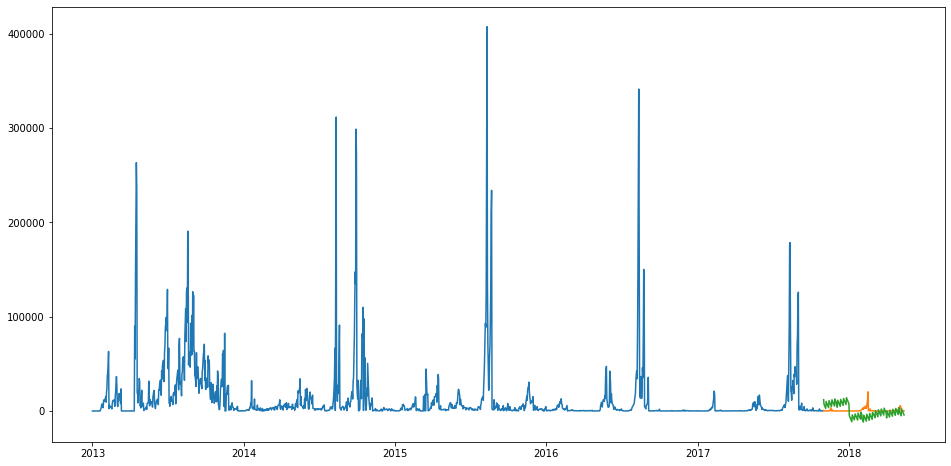

In [43]:
test['Predictions'] = predictions

test.index = education_data[train_size:].index
train.index = education_data[:train_size].index
plt.figure(figsize=(16,8))
plt.plot(train['Count'])
plt.plot(test[['Count', 'Predictions']])

In [61]:
from pyramid.arima import auto_arima

In [62]:
train = education_data[:train_size]
test = education_data[train_size:]

training = train['Count']
testing = test['Count']
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=39684.131, BIC=39711.407, Fit time=24.841 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=40626.119, BIC=40637.030, Fit time=0.296 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=40202.965, BIC=40224.786, Fit time=20.150 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=39767.530, BIC=39789.351, Fit time=23.881 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=39685.795, BIC=39718.527, Fit time=46.972 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=40362.358, BIC=40384.180, Fit time=5.110 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=39685.782, BIC=39718.513, Fit time=76.678 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=39676.154, BIC=39714.341, Fit time=110.514 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=39795.646, BIC=39828.378, Fit time=24.448 seconds
Fi

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [64]:
n_predictions = len(education_data) - train_size

forecast = model.predict(n_periods=n_predictions)
forecast = pd.DataFrame(forecast, index = test.index, columns=['Prediction'])

In [66]:
rms=np.sqrt(np.mean(np.power((np.array(test['Count']) - np.array(forecast['Prediction'])),2)))
print(rms)

3810.631818492947


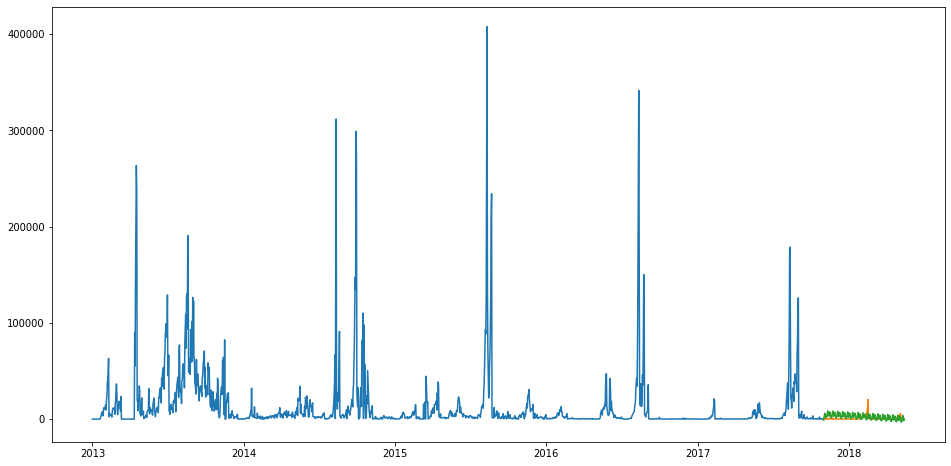

In [67]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'])
plt.plot(test['Count'])
plt.plot(forecast['Prediction'])

In [ ]:
def fit_model(x_train, y_train)

## LSTM

In [12]:
print(len(education_data))

1936


Trying LSTM.
Will use the last 90 values to predict the next value
train will form 0.66 of the total data

In [16]:
# Test train split.
train_size = int(0.66 * len(education_data))
train, test = education_data.values[:train_size], education_data.values[train_size:]
print(len(train))
print(len(test))
assert len(train) + len(test) == len(education_data)

1277
659


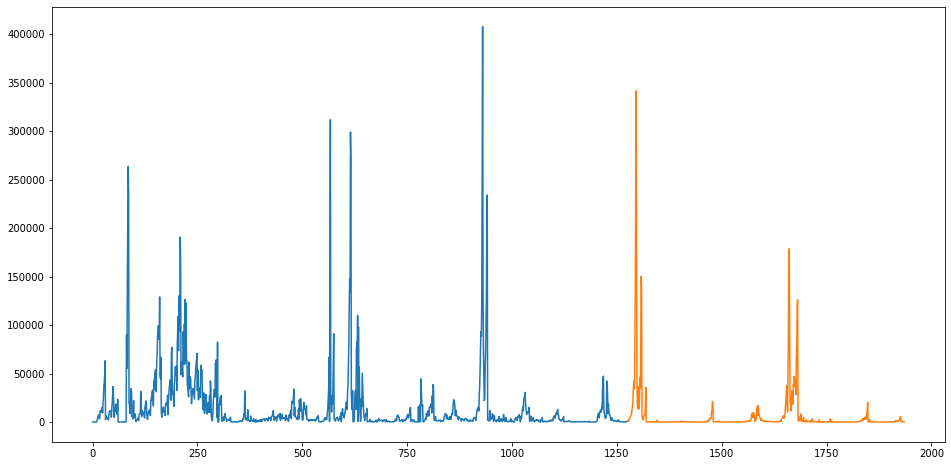

In [9]:
plt.figure(figsize=(16, 8))
plt.plot(train)
plt.plot([None for x in train] + [x for x in test])

In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(education_data.values)
scaled_data

array([[7.36089744e-06],
       [2.45363248e-06],
       [1.22681624e-05],
       ...,
       [8.80854060e-04],
       [5.79057265e-04],
       [6.01139958e-04]])

In [12]:
import numpy as np
x_train, y_train = [], []
for i in range(90, len(train)):
    x_train.append(scaled_data[i - 90: i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

print("Shape of x train", x_train.shape)
print("Shape of y train", y_train.shape)

Shape of x train (1187, 90)
Shape of y train (1187,)


In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1187, 90, 1)


In [14]:
# Create the LSTM Network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 138s - loss: 0.0047


In [39]:
# x_test = []
# for i in range(0, 60):
#     x_test.append(scaled_data[len(scaled_data) - len(test) - 60 + i])
# x_test = np.array(x_test)
# x_test = scaled_data[len(scaled_data) - len(test) - 90: len(scaled_data) - len(test)]
x_test = x_train[-1]
print(x_test.shape)
# print(x_test)
# y_test = scaled_data[len(scaled_data) - len(test):]
x_test = np.reshape(x_test, (1, x_test.shape[0], x_test.shape[1]))
# x_test = x_test.reshape(-1, 1)
# print(x_test)

# result = []
# for i in range(0, len(test)):
y = model.predict(x_test)
print(y)
y = scaler.inverse_transform(y)
print(y)
print(y_train.shape)
# print(scaler.inverse_transform(y_train[-1].reshape(-1, 1)))
#     x_test.append(y)
#     result.append(y)

# results = scaler.inverse_transform(results)
# y_test = scaler.inverse_transform(y_test)
# Calculate rms of result and y test after doing inverse transform
# Plot
    

(90, 1)
[[0.02219531]]
[[9046.897]]
(1187,)
